### Linear Regression

At first, we will generate synthetic data based on a linear relationship and visualize it using a scatter plot. We will also add Gaussian noise to the data to simulate real-world scenarios. 

Afterwards, we will try to fit a (linear) model to the data and check if we can reconstruct/uncover the true underlying model parameter.

In [1]:
# Import some libraries we will use
import numpy as np
import matplotlib.pyplot as plt

### Linear Model Function Description

The `linear_model` function predicts the dependent variable $y$ from the independent variable $x$ based on a linear relationship. It uses the equation $y = \theta_1 x + \theta_0$, where $\theta_1$ is the slope and $\theta_0$ is the intercept of the line.


In [2]:
# Define the linear model function to predict y from x
def linear_model(x, theta_1, theta_0):
    """
    Linear model to predict y from x based on a linear relationship.
    
    Parameters:
    - x (array-like): Independent variable.
    - theta_1 (float): Slope of the line.
    - theta_0 (float): Intercept of the line.
    
    Returns:
    - y (array): Predicted values of the dependent variable.
    """
    return theta_1 * x + theta_0

In [3]:
# Step 1: Generate Synthetic Data
# True parameters for the linear relationship (usually unknown in practice)
theta_1 = 3   # Slope
theta_0 = 4   # Intercept

# Generate some x values
x = np.random.uniform(0, 10, 50)

print(x)


[3.73385191 9.17490992 1.21621939 7.98890168 0.7368792  5.22374018
 4.95392297 3.82060075 3.13403804 2.51216445 2.0054085  3.25714311
 9.32092897 4.34230818 2.19971619 6.61567826 0.4471018  0.69303332
 8.7676699  3.0936629  7.40170251 5.75903499 6.67497802 8.05076757
 6.78407396 4.3126202  9.35613104 5.31907135 8.49469676 4.67938674
 5.22487891 2.28832493 5.46544285 3.46114768 1.13052022 4.37967079
 8.03933092 7.17580746 1.11804475 9.39309485 9.49471277 3.98257648
 4.39950766 6.60752422 9.20275382 3.18139922 6.84542419 6.9742855
 4.37290158 9.20121713]


In [4]:

# Compute y values without noise
y_true = linear_model(x, theta_1, theta_0)

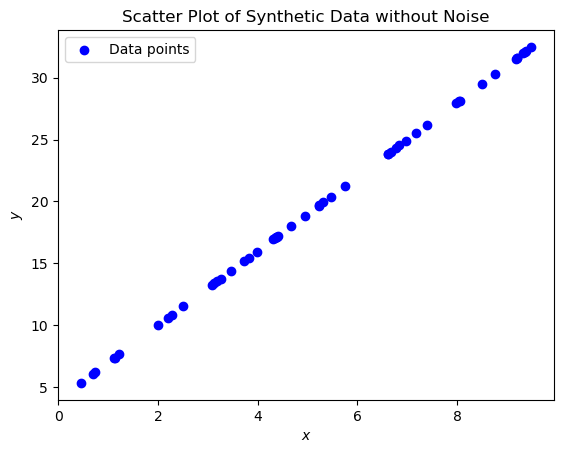

In [5]:
# Plot the data
plt.scatter(x, y_true, color="blue", label="Data points")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Scatter Plot of Synthetic Data without Noise")
plt.legend()
plt.show()


In [6]:
# Generate external Gaussian noise
noise_level = 2  # Standard deviation of the noise
noise = np.random.normal(0, noise_level, x.shape)
print(noise)


[ 0.12240504  3.14563579 -3.19624815  2.18428786 -0.15334546  1.49146902
 -0.31756696  1.81297648  3.73823068  2.65563196 -0.99764165 -2.51433169
  0.54203785  0.43336704 -0.7098539  -0.66829135 -2.19389612  0.12943351
 -0.14367513  0.10629853 -5.11994886 -2.9591921   1.07857534 -1.35373194
 -0.56296313  3.58874121  2.24544822  0.62081495 -2.02370785 -1.26529886
 -1.54793539 -0.01718201 -0.92435948  0.08445265  0.41326833 -0.97152039
  0.88805066 -2.02468031 -3.57710824  1.98831642 -0.72529383  0.15276953
 -2.96508282  1.59313854 -4.92667475 -3.04375982  2.48079295 -3.06889207
  1.16331013 -2.39251191]


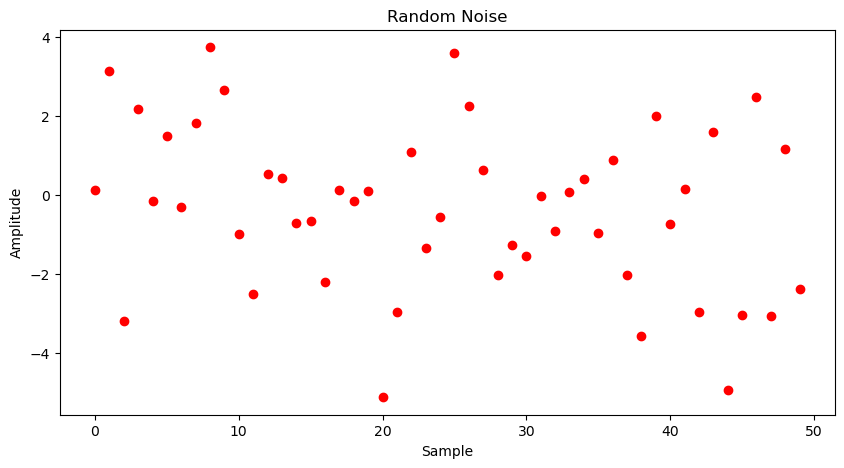

In [7]:
# Plot the noise
plt.figure(figsize=(10, 5))
plt.plot(noise, color='red', marker='o', linestyle='None')
plt.title('Random Noise')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

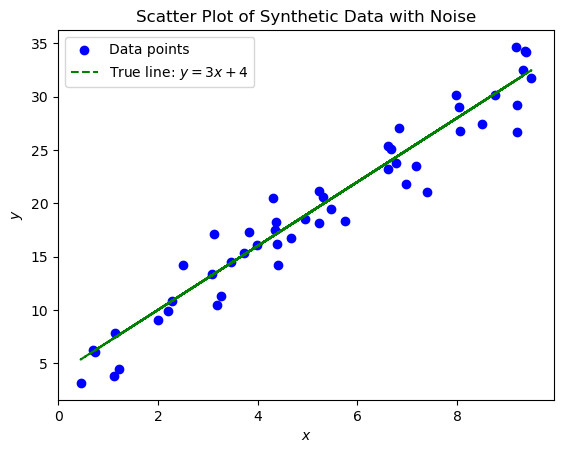

In [9]:

# Add noise to y
y = y_true + noise

# Plot the data
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_true, color="green", linestyle="--", label=f"True line: $y = {theta_1}x + {theta_0}$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Scatter Plot of Synthetic Data with Noise")
plt.legend()
plt.show()


### Training the Model: Estimating Parameters

In this section, we will estimate the parameters of our linear model, namely the slope ($\theta_1$) and the intercept ($\theta_0$). This process is often referred to as "training" the model. We will use the least squares method to find the best-fitting line to our noisy data. For more complicated models, other methods are used to estimate the model parameters. The goal is to minimize the sum of the squared differences between the observed values and the values predicted by our model. Good that we can calculate that analytically :)

# Linear Regression using Ordinary Least Squares (OLS)

Linear regression is a method to model the relationship between a dependent variable $y$ and one or more independent variables $x$. The goal is to find the best-fitting line through the data points.

## Ordinary Least Squares (OLS)

OLS is a method to estimate the parameters $\theta_0$ and $\theta_1$ of the linear regression model. The linear regression model can be written as:

$$ y_i = \theta_0 + \theta_1 x_i + \epsilon_i $$

where:
- $y_i$ is the $i$-th observed dependent variable.
- $x_i$ is the $i$-th observed independent variable.
- $\theta_0$ is the intercept.
- $\theta_1$ is the slope.
- $\epsilon_i$ is the error term for the $i$-th observation.

The OLS method minimizes the sum of the squared residuals (the differences between the observed and predicted values). The objective function to minimize is:

$$ L(\theta_0, \theta_1) = \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 $$

## Analytical Solution

To find the optimal values of $\theta_0$ and $\theta_1$, we need to take the partial derivatives of $L(\theta_0, \theta_1)$ with respect to $\theta_0$ and $\theta_1$, and set them to zero.

### Partial Derivative with respect to $\theta_0$

$$ \frac{\partial L}{\partial \theta_0} = \frac{\partial}{\partial \theta_0} \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 $$

Using the chain rule:

$$ \frac{\partial L}{\partial \theta_0} = \sum_{i=1}^{n} 2(y_i - (\theta_0 + \theta_1 x_i))(-1) $$

Simplifying:

$$ \frac{\partial L}{\partial \theta_0} = -2 \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i) $$

Setting the derivative to zero:

$$ -2 \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i) = 0 $$

Factoring out -2 (A product is only 0 if one of the terms is zero; -2 cannot be zero):

$$ \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i) = 0 $$

Rearranging:

$$ \sum_{i=1}^{n} y_i = n \theta_0 + \theta_1 \sum_{i=1}^{n} x_i $$

Solving for $\theta_0$:

$$ \theta_0 = \frac{\sum_{i=1}^{n} y_i - \theta_1 \sum_{i=1}^{n} x_i}{n} $$

### Partial Derivative with respect to $\theta_1$

$$ \frac{\partial L}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 $$

Using the chain rule:

$$ \frac{\partial L}{\partial \theta_1} = \sum_{i=1}^{n} 2(y_i - (\theta_0 + \theta_1 x_i))(-x_i) $$

Simplifying:

$$ \frac{\partial L}{\partial \theta_1} = -2 \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i)x_i $$

Setting the derivative to zero:

$$ -2 \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i)x_i = 0 $$

Factoring out -2 (A product is only 0 if one of the terms is zero; -2 cannot be zero):

$$ \sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i)x_i = 0 $$

Rearranging:

$$ \sum_{i=1}^{n} y_i x_i = \theta_0 \sum_{i=1}^{n} x_i + \theta_1 \sum_{i=1}^{n} x_i^2 $$

Substituting $\theta_0$ from the previous equation:

$$ \sum_{i=1}^{n} y_i x_i = \left( \frac{\sum_{i=1}^{n} y_i - \theta_1 \sum_{i=1}^{n} x_i}{n} \right) \sum_{i=1}^{n} x_i + \theta_1 \sum_{i=1}^{n} x_i^2 $$

Simplifying:

$$ \sum_{i=1}^{n} y_i x_i = \frac{\sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i}{n} - \theta_1 \frac{(\sum_{i=1}^{n} x_i)^2}{n} + \theta_1 \sum_{i=1}^{n} x_i^2 $$

Solving for $\theta_1$:

$$ \theta_1 = \frac{n \sum_{i=1}^{n} y_i x_i - \sum_{i=1}^{n} y_i \sum_{i=1}^{n} x_i}{n \sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2} $$

Remember the equation for $\theta_0$ from above:

$$ \theta_0 = \frac{\sum_{i=1}^{n} y_i - \theta_1 \sum_{i=1}^{n} x_i}{n} $$

## Using Mean, Variance, and Covariance

We can express the above formulas using the mean, variance, and covariance of the data.

- Mean of $x$: $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
- Mean of $y$: $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$
- Variance of $x$: $\text{Var}(x) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$
- Covariance of $x$ and $y$: $\text{Cov}(x, y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

Using these definitions, we can rewrite the formulas for $\theta_0$ and $\theta_1$ as:

$$ \theta_0 = \bar{y} - \theta_1 \bar{x} $$

Start with the least squares formula for $\theta_1$:

$$
\theta_1 = \frac{n \sum_{i=1}^n y_i x_i - \sum_{i=1}^n y_i \sum_{i=1}^n x_i}{n \sum_{i=1}^n x_i^2 - \left( \sum_{i=1}^n x_i \right)^2}
$$

Define the means:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

Substitute the means into the numerator and denominator:

$$
\theta_1 = \frac{\sum_{i=1}^n \left( x_i y_i \right) - n \bar{x} \bar{y}}{\sum_{i=1}^n x_i^2 - n \bar{x}^2}
$$

### Rewrite the numerator in terms of deviations from the mean:

We start with the numerator of the formula for $\theta_1$:

$$
\text{Numerator} = \sum_{i=1}^n y_i x_i - n \bar{y} \bar{x}
$$

Our goal is to rewrite this in terms of deviations from the mean: $ (x_i - \bar{x}) $ and $ (y_i - \bar{y}) $.

We know that each $ y_i $ and $ x_i $ can be written as:

$$
y_i = (y_i - \bar{y}) + \bar{y}, \quad x_i = (x_i - \bar{x}) + \bar{x}.
$$

Substituting these into the product $ y_i x_i $:

$$
y_i x_i = \left( (y_i - \bar{y}) + \bar{y} \right) \left( (x_i - \bar{x}) + \bar{x} \right).
$$

Using the distributive property, expand $ y_i x_i $:

$$
y_i x_i = (y_i - \bar{y})(x_i - \bar{x}) + (y_i - \bar{y})\bar{x} + \bar{y}(x_i - \bar{x}) + \bar{y}\bar{x}.
$$

Now, substitute this expanded form into the numerator:

$$
\sum_{i=1}^n y_i x_i - n \bar{y} \bar{x} = \sum_{i=1}^n \left[ (y_i - \bar{y})(x_i - \bar{x}) + (y_i - \bar{y})\bar{x} + \bar{y}(x_i - \bar{x}) + \bar{y}\bar{x} \right] - n \bar{y} \bar{x}.
$$


We split the sum into four terms:

$$
\sum_{i=1}^n y_i x_i - n \bar{y} \bar{x} =
\sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x}) + \sum_{i=1}^n (y_i - \bar{y})\bar{x} + \sum_{i=1}^n \bar{y}(x_i - \bar{x}) + \sum_{i=1}^n \bar{y}\bar{x} - n \bar{y} \bar{x}.
$$

where 

$$
\sum_{i=1}^n (y_i - \bar{y}) = 0
$$

and


$$
\sum_{i=1}^n (x_i - \bar{x}) = 0
$$

as the sum of deviations from the mean is exactly zero. This does not dependent on the specific values in the data and is always true.

This gives:
$$
\theta_1 = \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)}{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}
$$
Use the definitions of covariance and variance:

$$
\text{Cov}(x, y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}), \quad \text{Var}(x) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
$$

Express $\theta_1$ as:

$$
\theta_1 = \frac{\text{Cov}(x, y)}{\text{Var}(x)}
$$



Finally providing:

$$ \theta_1 = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{\text{Cov}(x, y)}{\text{Var}(x)}$$




In [10]:
# Step 2: Calculate the Linear Regression Parameters θ_1 and θ_0
# Using the least squares method to solve for θ_1 (slope) and θ_0 (intercept)

# Compute means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate θ_1 (slope)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
theta_1_estimated = numerator / denominator

# Calculate θ_0 (intercept)
theta_0_estimated = y_mean - theta_1_estimated * x_mean

print(f"Estimated parameters:")
print(f"θ_1 (slope) = {theta_1_estimated:.2f}")
print(f"θ_0 (intercept) = {theta_0_estimated:.2f}")


Estimated parameters:
θ_1 (slope) = 3.04
θ_0 (intercept) = 3.42


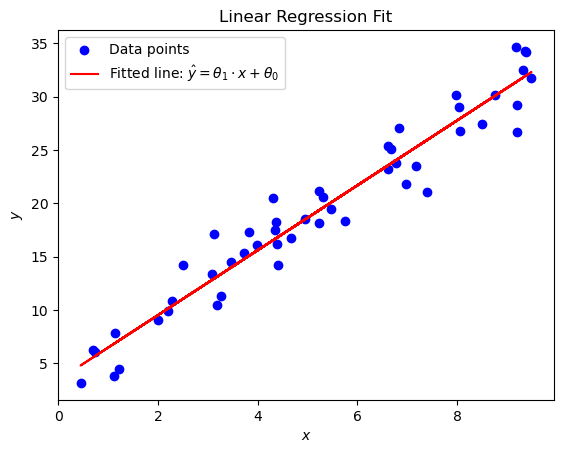

In [11]:
y_hat = linear_model(x, theta_1_estimated, theta_0_estimated)

# Plot the data and the regression line
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_hat, color="red", label="Fitted line: $\hat{y} = \\theta_1 \cdot x + \\theta_0$")
# plt.plot(x, y_true, color="green", label="True line: $y = \\theta_1 \cdot x + \\theta_0$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

Mean Absolute Error (MAE) = 1.67


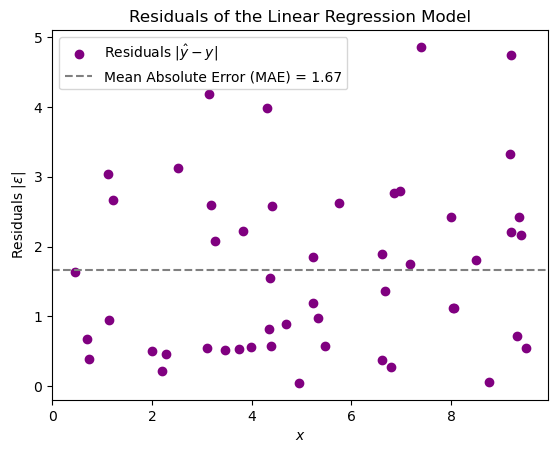

In [12]:
# Step 4: Calculate the residuals (errors)
# Error (residual) for each point: ε = |ŷ - y|
errors = np.abs(y - y_hat)

# Mean Absolute Error (MAE) as an overall error metric
mae = np.mean(errors)
print(f"Mean Absolute Error (MAE) = {mae:.2f}")

# Plot the residuals
plt.scatter(x, errors, color="purple", label="Residuals |$\hat{y} - y$|")
plt.axhline(y=mae, color="gray", linestyle="--", label=f"Mean Absolute Error (MAE) = {mae:.2f}")
plt.xlabel("$x$")
plt.ylabel("Residuals |$\\epsilon$|")
plt.title("Residuals of the Linear Regression Model")
plt.legend()
plt.show()


### Gradient Descent

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. It is particularly useful for optimizing complex functions where analytical solutions are difficult or impossible to obtain. In the context of linear regression, gradient descent can be used to minimize the loss function, which measures the difference between the predicted values and the actual values.

#### How Gradient Descent Works

1. **Initialization**: Start with initial guesses for the parameters (e.g., $\theta_0$ and $\theta_1$). These can be random values or zeros.

2. **Compute the Cost**: Calculate the loss function, often the Mean Squared Error (MSE), which quantifies the error between the predicted values and the actual values.

3. **Compute the Gradient**: Calculate the gradient of the loss function with respect to each parameter. The gradient is a vector of partial derivatives that points in the direction of the steepest increase in the loss function.

4. **Update the Parameters**: Adjust the parameters in the opposite direction of the gradient. The size of the adjustment is controlled by the learning rate, a hyperparameter that determines the step size.

5. **Iterate**: Repeat steps 2-4 until the loss function converges to a minimum or a predefined number of iterations is reached.

#### Mathematical Formulation

For a linear regression model with parameters $\theta_0$ (intercept) and $\theta_1$ (slope), the loss function $L(\theta_0, \theta_1)$ is given by:

$$ L(\theta_0, \theta_1) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

where:
- $n$ is the number of training examples.
- $h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$ is the hypothesis function, i.e. the model.
- $y^{(i)}$ is the actual value.

The gradients of the loss function with respect to $\theta_0$ and $\theta_1$ are:

$$ \frac{\partial L}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)}) $$
$$ \frac{\partial L}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $$

The parameters are updated as follows:

$$ \theta_0 := \theta_0 - \eta \frac{\partial L}{\partial \theta_0} $$
$$ \theta_1 := \theta_1 - \eta \frac{\partial L}{\partial \theta_1} $$

where $\eta$ is the learning rate.

#### Advantages of Gradient Descent

- **Scalability**: Gradient descent can handle large datasets and high-dimensional parameter spaces.
- **Flexibility**: It can be applied to a wide range of optimization problems beyond linear regression.
- **Efficiency**: For large datasets, stochastic gradient descent (SGD) and mini-batch gradient descent can be used to speed up the optimization process.

#### Challenges

- **Choosing the Learning Rate**: A learning rate that is too high can cause the algorithm to diverge, while a learning rate that is too low can make the convergence very slow.
- **Local Minima**: For non-convex functions, gradient descent can get stuck in local minima. However, for convex functions like the linear regression loss function, this is not an issue.

Gradient descent is a powerful tool for training machine learning models and is widely used in various applications, including neural networks and deep learning.

<img src="images/gradient_descent.png" alt="Gradient Descent" style="width: 70%;">



In [13]:
def gradient_descent(x, y, theta_1_init, theta_0_init, learning_rate, epochs):
    
    # Initialize parameters
    theta_1 = theta_1_init
    theta_0 = theta_0_init
    
    n = len(y)
    loss_history = []

    for _ in range(epochs):        
        # make predictions with current set of parameters
        y_pred = theta_1 * x + theta_0
        
        # Compute loss
        error = y_pred - y
        loss = (1 / (2 * n)) * np.sum(error ** 2)
        loss_history.append(loss)

        # Compute gradients
        gradient_theta_1 = (1 / n) * np.sum(error * x)
        gradient_theta_0 = (1 / n) * np.sum(error)

        # Parameter updates in direction of negative gradient
        theta_1 -= learning_rate * gradient_theta_1
        theta_0 -= learning_rate * gradient_theta_0

    return theta_1, theta_0, loss_history



In [14]:
# Initial parameters
theta_1_init = 0
theta_0_init = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Run gradient descent
theta_1_learned, theta_0_learned, loss_history = gradient_descent(x, y, theta_1_init, theta_0_init, learning_rate, epochs)

print(f'True parameters: theta_1 = {theta_1}, theta_0 = {theta_0}')
print(f'Learned parameters: theta_1 = {theta_1_learned:.4f}, theta_0 = {theta_0_learned:.4f}')
print(f'Learned parameters before with analytical gradient: theta_1 = {theta_1_estimated:.4f}, theta_0 = {theta_0_estimated:.4f}')

True parameters: theta_1 = 3, theta_0 = 4
Learned parameters: theta_1 = 3.0991, theta_0 = 3.0504
Learned parameters before with analytical gradient: theta_1 = 3.0430, theta_0 = 3.4208


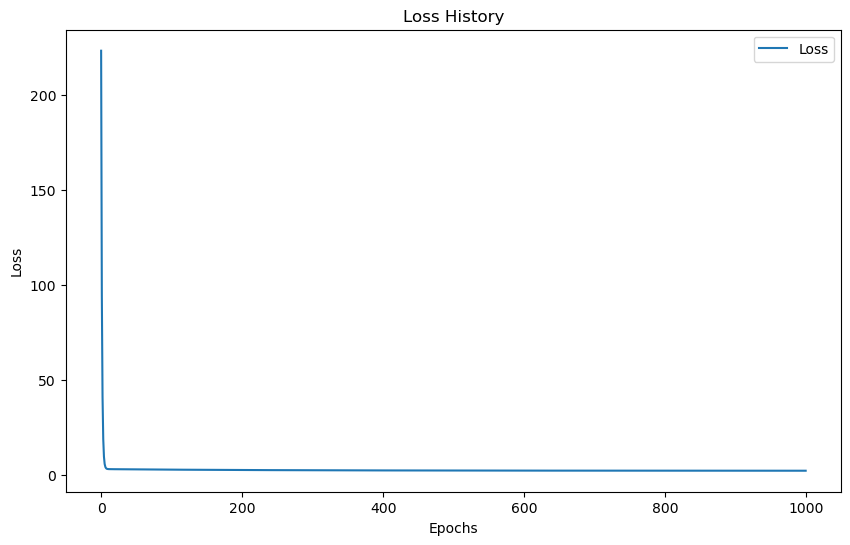

In [15]:
# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()